In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
file_path = ('F:/AnalytixLabs/Manuj_DS/Case Study 4 Data Visualization/')
df_sales = pd.read_csv (file_path + 'SalesData.csv')

In [3]:
df_sales.head(2)

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31


In [4]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3709 entries, 0 to 3708
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AccountId           3709 non-null   int64  
 1   AccountName         3709 non-null   object 
 2   Region              3709 non-null   object 
 3   Division            3709 non-null   object 
 4   City                3709 non-null   object 
 5   State               3709 non-null   object 
 6   Tier                3709 non-null   object 
 7   Month               3709 non-null   object 
 8   Sales2015           3709 non-null   float64
 9   Sales2016           3709 non-null   float64
 10  Units2015           3709 non-null   float64
 11  Units2016           3709 non-null   float64
 12  TargetAchevied2015  3709 non-null   float64
 13  TargetAchevied2016  3709 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 405.8+ KB


In [5]:
df_sales.isna().sum()

AccountId             0
AccountName           0
Region                0
Division              0
City                  0
State                 0
Tier                  0
Month                 0
Sales2015             0
Sales2016             0
Units2015             0
Units2016             0
TargetAchevied2015    0
TargetAchevied2016    0
dtype: int64

In [6]:
df_sales.describe()

,AccountId,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
count,3.709000e+03,3709.000000,3709.000000,3709.000000,3709.00000,3709.000000,3709.000000
mean,7.716535e+04,6134.912371,7998.039527,2.293567,3.00791,1.067396,1.242354
std,2.417615e+05,9195.070153,11130.551032,3.659052,4.31373,0.211269,0.192727
min,1.116000e+03,-11053.440000,-59090.810000,-3.000000,-17.00000,0.700000,0.910000
25%,3.774000e+03,0.000000,1886.690000,0.000000,1.00000,0.880000,1.080000
50%,6.500000e+03,3128.340000,3918.770000,1.000000,1.83330,1.070000,1.240000
75%,1.041900e+04,7837.540000,10122.400000,3.000000,4.00000,1.250000,1.410000
max,1.219499e+06,145760.120000,168033.360000,53.000000,61.00000,1.420000,1.570000


## SALES DATA VISUALIZATION DASHBOARD

###  1. Compare Sales by region for 2016 with 2015 using bar chart

In [9]:
reg_sales = df_sales.groupby ('Region')[['Sales2016','Sales2015']].sum()
reg_sales

,Sales2016,Sales2015
Region,,
Central,9.787809e+06,7.891729e+06
East,1.266723e+07,9.512916e+06
West,7.209689e+06,5.349745e+06


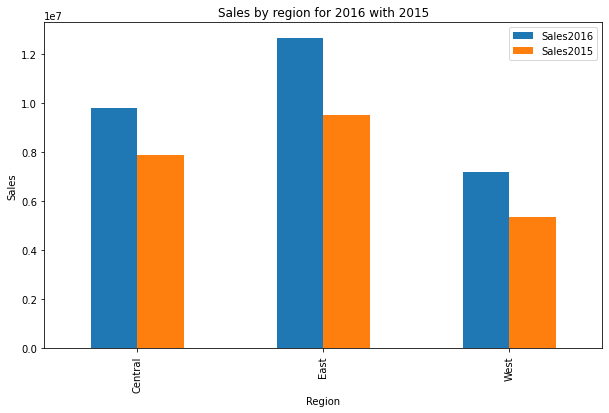

In [12]:
reg_sales.plot (kind = 'bar', figsize = (10,6))
plt.xlabel ('Region')
plt.ylabel ('Sales')
plt.title ('Sales by region for 2016 with 2015')
plt.show()

### 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

In [13]:
df_sales.head(2)

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31


In [16]:
sales_2016_pie = df_sales.groupby ('Region')['Sales2016'].sum()
sales_2016_pie

Region
Central    9.787809e+06
East       1.266723e+07
West       7.209689e+06
Name: Sales2016, dtype: float64

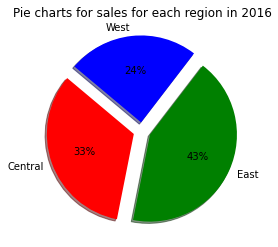

In [30]:
plt.pie (x = sales_2016_pie,
    explode=[0.1,0.1,0.1],
    labels=['Central','East','West'],
    colors=['r','g','b'],
    autopct="%1.0f%%",
        shadow = True,
        startangle =140)
plt.title ('Pie charts for sales for each region in 2016')
plt.show()

### 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

In [31]:
df_sales.head(2)

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31


In [46]:
sales_r_t = df_sales.groupby (['Region','Tier'])[['Sales2015','Sales2016']].sum()
sales_r_t

Sales2015     Sales2016
Region  Tier                            
Central High  4.798698e+06  6.026043e+06
        Low   9.434397e+05  1.132833e+06
        Med   2.068226e+06  2.632181e+06
        Out   8.136489e+04 -3.248530e+03
East    High  6.102946e+06  7.817151e+06
        Low   9.016658e+05  1.144930e+06
        Med   2.470998e+06  3.705150e+06
        Out   3.730655e+04  0.000000e+00
West    High  2.944789e+06  3.768038e+06
        Low   6.710644e+05  1.099502e+06
        Med   1.718476e+06  2.342149e+06
        Out   1.541508e+04  0.000000e+00

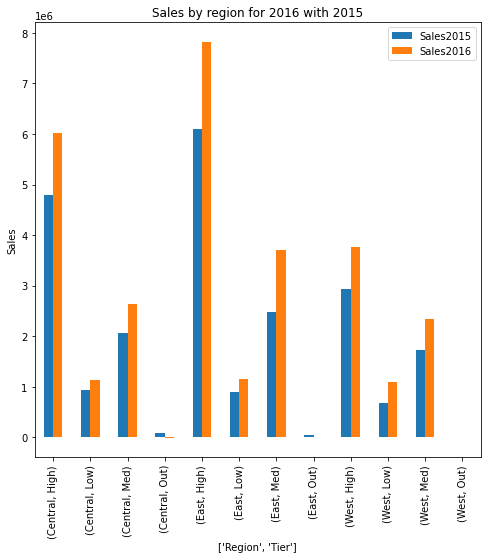

In [49]:
sales_r_t.plot (kind = 'bar', figsize = (8,8))
plt.xlabel ( ['Region','Tier'])
plt.ylabel ('Sales')
plt.title ('Sales by region for 2016 with 2015')

plt.show()

### 4. In East region, which state registered a decline in 2016 as compared to 2015?

In [51]:
#Filtering
sales_east = df_sales.loc [df_sales.Region == 'East'][['State','Sales2015','Sales2016']]
sales_east

,State,Sales2015,Sales2016
2,CT,0.00,6627.00
3,CT,19881.00,13254.00
4,MA,3684.48,0.00
5,ME,0.00,10525.24
6,ME,2631.31,42812.62
...,...,...,...
3682,MA,3128.34,3128.34
3695,FL,0.00,16163.05
3700,NY,7368.96,0.00
3704,NY,3684.48,0.00


Text(0.5, 1.0, 'Sales by region for 2016 with 2015')

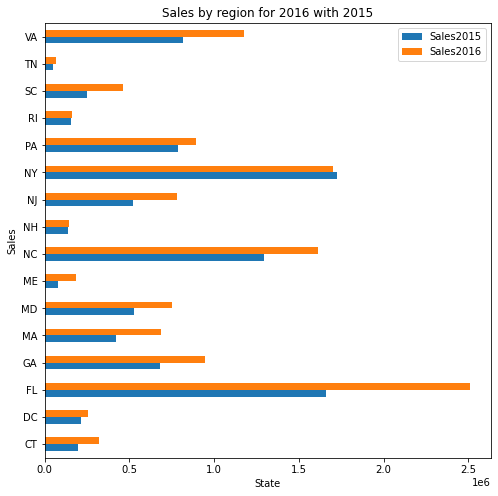

In [55]:
sales_g = df_sales.groupby (['Region','State'])[['Sales2015','Sales2016']].sum()
sales_g.loc ['East'].plot (kind = 'barh', figsize = (8,8))
plt.xlabel ('State')
plt.ylabel ('Sales')
plt.title ('Sales by region for 2016 with 2015')

### 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

In [57]:
sales_division_tier =df_sales.groupby(["Tier","Division"])[["Units2015","Units2016"]].sum()

Text(0.5, 1.0, 'Units by region for 2016 with 2015')

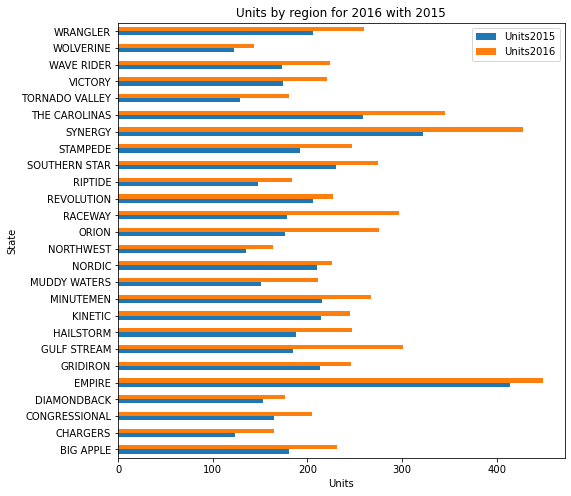

In [59]:
sales_division_tier.loc["High"].plot (kind = 'barh', figsize = (8,8))
plt.xlabel ('Units')
plt.ylabel ('State')
plt.title ('Units by region for 2016 with 2015')

### 6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. The Quarters are based on months and defined as -
- Jan - Mar : Q1
- Apr - Jun : Q2
- Jul - Sep : Q3
- Oct - Dec : Q4

In [61]:
df_sales.head(2)

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31


In [63]:
Q1 = (df_sales['Month'] == 'Jan') | (df_sales['Month'] == 'Feb') | (df_sales['Month'] == 'Mar')
Q2 = (df_sales['Month'] == 'Apr') | (df_sales['Month'] == 'May') | (df_sales['Month'] == 'Jun')
Q3 = (df_sales['Month'] == 'Jul') | (df_sales['Month'] == 'Aug') | (df_sales['Month'] == 'Sep')
Q4 = (df_sales['Month'] == 'Oct') | (df_sales['Month'] == 'Nov') | (df_sales['Month'] == 'Dec')

conditions = [Q1,Q2,Q3,Q4]
choices = ['Q1','Q2','Q3','Q4']

df_sales ['Quarter'] = np.select ( conditions ,choices , default ="")
df_sales.head(5)

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Quarter
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29,Q2
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17,Q1
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53,Q3


### 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot

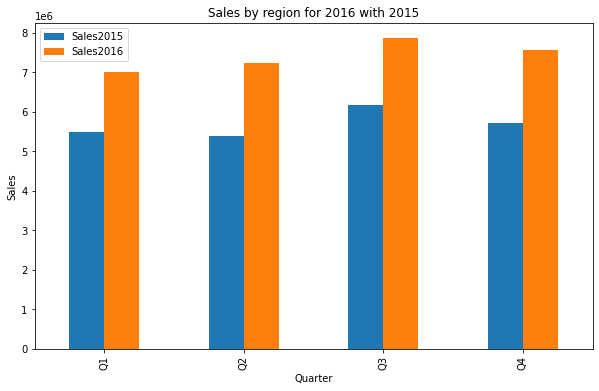

In [65]:
qtr_sales = df_sales.groupby ('Quarter')[['Sales2015','Sales2016']].sum()
qtr_sales.plot (kind = 'bar', figsize = (10,6))
plt.xlabel ('Quarter')
plt.ylabel ('Sales')
plt.title ('Sales by region for 2016 with 2015')
plt.show()

### 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.
(Draw 4 pie charts representing a Quarter for each Tier)

In [102]:
#grouping the data based on "Qtr" and "Tier" to find total sales in 2016
qtr_pivot = df_sales.pivot_table(index='Quarter',columns='Tier',values='Sales2016')
a= qtr_pivot.loc['Q3','Out'] *-0.6
qtr_pivot.loc['Q3','Out'] =a 
qtr_pivot

Tier,High,Low,Med,Out
Quarter,,,,
Q1,7974.677515,5516.469593,7654.041681,0.000000
Q2,8752.018136,5031.608757,8758.157542,0.000000
Q3,9334.404693,5446.422671,8197.976091,216.568667
Q4,9386.142545,5052.104694,8307.596804,0.000000


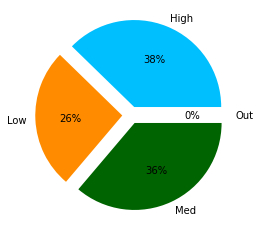

In [103]:


#Qtr Q1
plt.pie(x=qtr_pivot.loc["Q1",:],autopct="%1.0f%%",labels=["High","Low","Med","Out"],
        colors=['deepskyblue', 'darkorange', 'darkgreen'], explode = [0.1,0.1,0.1,0.1])
plt.show()



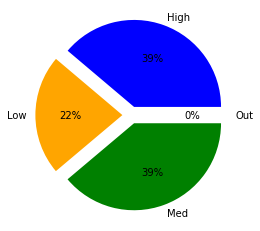

In [104]:

#Qtr Q2
plt.pie(x=qtr_pivot.loc["Q2",:],autopct="%1.0f%%",labels=["High","Low","Med","Out"],
        colors=['blue', 'orange', 'green','red'], explode = [0.1,0.1,0.1,0.1])
plt.show()

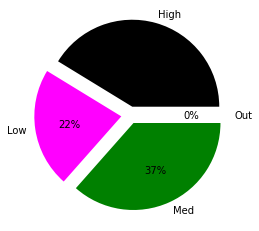

In [105]:

#Qtr Q3
plt.pie(x=qtr_pivot.loc["Q4",:],autopct="%1.0f%%",labels=["High","Low","Med","Out"],
        colors=['black', 'magenta', 'green','red'], explode = [0.1,0.1,0.1,0.1])
plt.show()

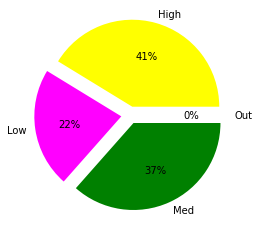

In [106]:

#Qtr Q4
plt.pie(x=qtr_pivot.loc["Q4",:],autopct="%1.0f%%",labels=["High","Low","Med","Out"],
        colors=['yellow', 'magenta', 'green','red'], explode = [0.1,0.1,0.1,0.1])
plt.show()

In [112]:
pie_E=pd.crosstab (index = df_sales['Quarter'], columns = df_sales['Tier'], 
                   values = df_sales['Sales2016'], aggfunc ='sum')
pie_E.loc['Q3','Out']=pie_E.loc['Q3','Out'] *-0.2
pie_E

Tier,High,Low,Med,Out
Quarter,,,,
Q1,3867718.595,948832.77,2.181402e+06,0.000
Q2,4130952.560,890594.75,2.215814e+06,0.000
Q3,4872559.250,795177.71,2.197058e+06,649.706
Q4,4740001.985,742659.39,2.085207e+06,0.000


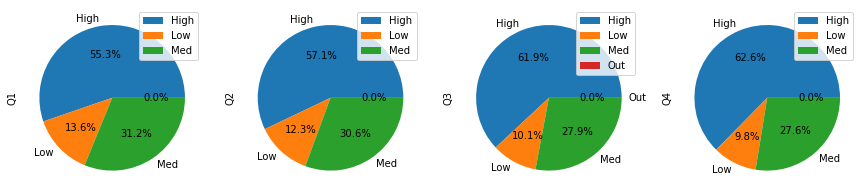

In [113]:
pie_E.T.plot(kind = "pie", subplots = True, legend = True, figsize = (15,8), autopct='%1.1f%%' )
plt.show()

In [114]:
import os
os.getcwd()

'C:\\Users\\somjit.das\\AnalytixLabs'